In [48]:
%matplotlib inline
import pandas as pd

## Load results

In [49]:
series = [
    'masked',
    'unmasked',
    'masked_reversed',
    'unmasked_reversed',
]
series_names = [
    'Masked',
    'Unmasked',
    'Masked R',
    'Unmasked R',
]
total_timess = {
   s: pd.read_csv(f'data/analysis5_2_{s}.csv')
   for s in series 
}

## Raw results

In [50]:
from ipywidgets import interact

In [54]:
total_timess['masked'] = total_timess['masked'][0:10]
total_timess['unmasked'] = total_timess['unmasked'][0:10]
total_timess['masked_reversed'] = total_timess['masked_reversed'][0:10]
total_timess['unmasked_reversed'] = total_timess['unmasked_reversed'][10:20]

In [55]:
@interact
def _(series=series):
    return total_timess[series]

interactive(children=(Dropdown(description='series', options=('masked', 'unmasked', 'masked_reversed', 'unmask…

## Comparison

In [56]:
comparison = pd.DataFrame({
    s: total_times.mean()
    for s, total_times in total_timess.items()
})
comparison.columns = series_names
comparison

,Masked,Unmasked,Masked R,Unmasked R
Flow*,92.548980,92.416499,92.546300,92.391264
P,5.981380,18.755163,0.263067,19.835058
Q,0.365059,83.170755,32.291056,82.918375
P | F(Q),6.464681,102.046390,32.686984,102.870154
tentative eval,0.825631,4.475867,0.842335,3.614993
root detection,0.002542,0.037751,0.011226,0.037826
composing flowpipe,5.180127,92.552414,30.358828,92.572644
Total,99.141424,194.590718,125.365845,195.389225


In [57]:
comparison.to_csv("data/comparison.csv")

In [58]:
comparison_stds = pd.DataFrame({
    s: total_times.std()
    for s, total_times in total_timess.items()
})
comparison_stds.columns = series_names
comparison_stds

,Masked,Unmasked,Masked R,Unmasked R
Flow*,0.117283,0.161680,0.134010,0.325332
P,0.020018,0.057019,0.021313,0.063465
Q,0.011164,0.135219,0.041216,0.188548
P | F(Q),0.024588,0.161514,0.062955,0.198097
tentative eval,0.014160,0.018737,0.019455,0.011270
root detection,0.000024,0.000092,0.000062,0.000218
composing flowpipe,0.019146,0.154315,0.044890,0.181844
Total,0.125326,0.312365,0.150726,0.257265


In [59]:
comparison2 = comparison.loc[['P', 'Q'],:].transpose()
comparison2

,P,Q
Masked,5.981380,0.365059
Unmasked,18.755163,83.170755
Masked R,0.263067,32.291056
Unmasked R,19.835058,82.918375


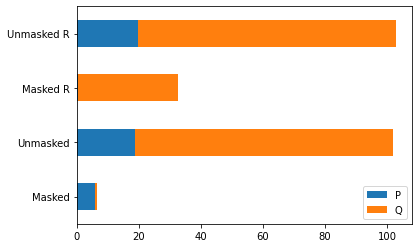

In [60]:
p = comparison2.plot(kind='barh', stacked=True, grid=False)
p

In [61]:
p.get_figure().savefig('images/comparison-analysis5-bar-chart-1.pdf')

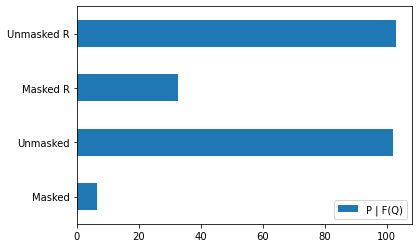

In [63]:
comparison3 = comparison.loc[['P | F(Q)'],:].transpose()
comparison3.plot(kind='barh')

In [64]:
comparison4 = comparison.loc[['Flow*', 'P', 'Q'],:].transpose()
comparison4

,Flow*,P,Q
Masked,92.548980,5.981380,0.365059
Unmasked,92.416499,18.755163,83.170755
Masked R,92.546300,0.263067,32.291056
Unmasked R,92.391264,19.835058,82.918375


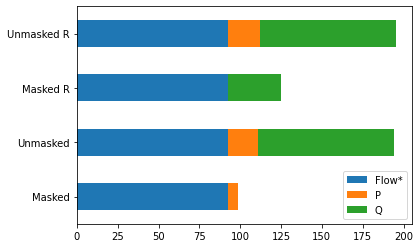

In [65]:
p = comparison4.plot(kind='barh', stacked=True, grid=False)
p

In [66]:
p.get_figure().savefig('images/comparison-analysis5-bar-chart-2.pdf')

In [67]:
comparison5 = comparison4.copy()

In [68]:
rem = comparison.loc['Total', :] - comparison4.sum(axis=1)
rem

Masked        0.246005
Unmasked      0.248301
Masked R      0.265423
Unmasked R    0.244528
dtype: float64

In [69]:
comparison5.loc[:,'Remainder'] = rem

In [70]:
comparison5

,Flow*,P,Q,Remainder
Masked,92.548980,5.981380,0.365059,0.246005
Unmasked,92.416499,18.755163,83.170755,0.248301
Masked R,92.546300,0.263067,32.291056,0.265423
Unmasked R,92.391264,19.835058,82.918375,0.244528


In [71]:
comparison5.to_csv("data/comparison-remainder.csv")

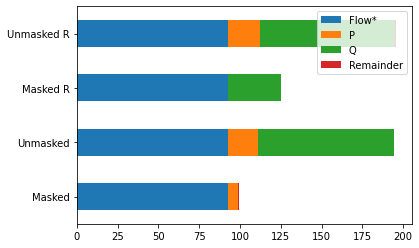

In [73]:
comparison5.plot(kind='barh', stacked=True, grid=False)

In [74]:
_.get_figure().savefig(
    'images/key-comparison-bar-chart.pdf')

In [75]:
comparison6 = comparison.loc[['Flow*', 'P', 'Q', 'Total'], :].transpose()

In [76]:
comparison6

,Flow*,P,Q,Total
Masked,92.548980,5.981380,0.365059,99.141424
Unmasked,92.416499,18.755163,83.170755,194.590718
Masked R,92.546300,0.263067,32.291056,125.365845
Unmasked R,92.391264,19.835058,82.918375,195.389225


In [77]:
comparison6.to_csv('data/key-comparison.csv')